# Equations de Lotka-Volterra

## Importation des modules nécessaires

Nous allons d'abord commencer par importer les différents modules dont nous aurons besoin pour simuler ces solutions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import autograd as atg

Puis, nous allons aussi importer la fonction `display_contour` que nous avons vue dans le projet d'octobre : celle-ci sera fort utile pour la question 5 !

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]
from IPython.display import display

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, cmap = 'inferno', 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

## Points d'équilibre, domaine maximal et stabilité

### Les équations de Lotka-Volterra

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :

$$\dot{x_1} = x_1(\alpha - \beta x_2)$$

$$\dot{x_2} = -x_2(\gamma - \delta x_1)$$

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement
et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.


### Deux points d'équilibre

#### Question 1

**Q** : Donner une interprétation physique à chaque terme de la dynamique.
Montrer qu’il existe deux points d’équilibre $(0, 0)$ et $\bar{x}\in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Que
peut-on dire de leur stabilité à ce stade ?

**R** : **Interprétation des termes**
- $\alpha$ correspond à la reproduction des proies
- $\beta$ correspond à la mort des proies due aux prédateurs
- $\gamma$ correspond à la mort des prédateurs sans nourriture
- $\delta$ correspond à la reproduction des prédateurs grâce aux proies mangées

**Quels points d'équilibre ?** Puis, nous remarquons que $(0,0)$ est bien un point d'équilibre : en se plaçant à $x_1 = 0$ et $x_2 = 0$, on obtient bien $\dot{x_1} = 0$ et $\dot{x_2} = 0$. Trouvons maintenant un autre point d'équilibre qui n'est pas $(0,0)$. Un des deux est donc non nul, supposons que c'est $x_1$. Alors, pour avoir $\dot{x_1} = 0$, nécessairement $\alpha - \beta x_2 = 0$ et donc :
$$x_2 = \frac{\alpha}{\beta}$$
On en déduit que $x_2 > 0$. Ceci nous permet, comme $\dot{x_2} = 0$ et que $x_2 \neq 0$, de trouver que $\delta - \gamma x_1 = 0$ et donc :
$$x_1 = \frac{\gamma}{\delta}$$
Ainsi, on a aussi $x_1 > 0$. On a notre deuxième point d'équilibre, $\bar{x}\in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

**Stabilité ?** On pose $f(x_1,x_2) = (x_1(\alpha - \beta x_2),-x_2(\gamma - \delta x_1))$. $f$ est clairement dérivable par rapport à ses deux variables, on a alors sa jacobienne:

$$ J_f(x_1,x_2) = \begin{pmatrix} \alpha - \beta x_2 & - \beta x_1 \\ \delta x_2 & - \gamma + \delta x_1 \end{pmatrix} $$
En se plaçant en $(0,0)$ :
$$J_f(0,0) = \begin{pmatrix} \alpha & 0 \\ 0 & - \gamma \end{pmatrix}$$
Comme $\alpha > 0$ et $-\gamma < 0$ sont les valeurs propres de cette matrice, et qu'une des 2 est strictement positive, on en déduit que $(0,0)$ n'est pas localement (et donc encore moins globalement) stable.
Cependant :
$$J_f(\bar{x}) = \begin{pmatrix} 0 & - \beta \frac{\gamma}{\delta} \\ \delta \frac{\alpha}{\beta} & 0 \end{pmatrix}$$
Son polynôme caractéristique est :
$$\chi_{J_f(\bar{x})}(x) = \begin{vmatrix} x &  \beta \frac{\gamma}{\delta} \\ -\delta \frac{\alpha}{\beta} & x \end{vmatrix} = x^2 + \alpha\gamma$$
Ses racines sont donc $r_{\pm} = \pm i\sqrt{\alpha\gamma}$, et on ne peut donc déterminer la stabilité locale ou globale de $\bar{x}$.

#### Question 2

**Q** : A l’aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le
champ de vecteurs. Intuiter le comportement des solutions. On pourra
aussi utiliser `streamplot` pour visualiser le portrait de phase.

**R** : **Visualisation du champ de vecteurs** Nous avons généré des `linspace` pour $x_1$ et $x_2$, avant d'en faire un `meshgrid` et d'utiliser `quiver` et `streamplot` pour tracer le champ de vecteurs associé.

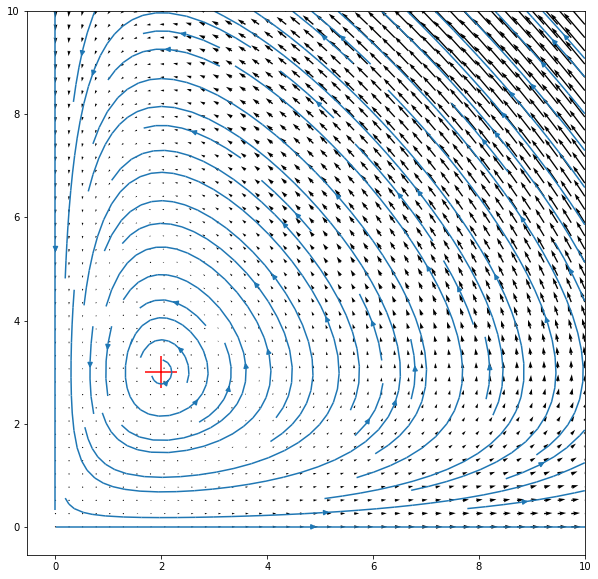

In [3]:
X1=np.linspace(0,10,40)
X2=np.linspace(0,10,40)
a=3
b=1
c=2
d=1
def lv(t,X):
    return np.array([X[0]*(a-b*X[1]),-X[1]*(c-d*X[0])])
def lvq(X):
    return lv(0,X)
X,Y=np.meshgrid(X1,X2)
#plt.scatter(X,Y,s=2)
Vx,Vy=lvq(np.array([X,Y]))   
xbar = [2,3]
plt.scatter(xbar[0],xbar[1],s=1000,c='r',marker='+')
plt.quiver(X,Y,Vx,Vy)
plt.streamplot(X,Y,Vx,Vy)




**Comportement des solutions** Avec le champ de vecteurs nouvellement formé, sur lequel nous avons pu marquer $\bar{x}$ d'une croix rouge, nous constatons que les solutions semblent tourner autour du point d'équilibre, avec donc potentiellement une évolution périodique de $x_1$ et $x_2$.

### Domaine maximal

#### Question 3

**Q** : Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.

**R** : **Première remarque** On initialise la solution dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, à $t_0$, avec $x_0 = (x_{10},x_{20})$. On suppose désormais qu'il existe $t_2$ tel que $x_1(t_2) < 0$. Mais alors, comme $x_1$ et $x_2$ sont continues, il existe par le Théorème des Valeurs Intermédiaires un temps $t_1$ tel que $x_1(t_1) = 0$.
Cependant, on a alors $\dot{x_1}(t_1) = 0$ : $x_1$ n'évolue plus ! Il reste constant à $0$, et ainsi le fait que $x_1(t_2) < 0$ est absurde. De même pour $x_2$.
Conclusion partielle : $x$ évolue dans $\mathbb{R}_{\geq 0} \times \mathbb{R}_{\geq 0}$

**Domaine d'évolution** On revient au cas d'avant, où $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. On a alors :
$$\forall t > t_1, \\ x_1 = 0 \\ \dot{x_2} = -\gamma x_2 $$

Mais alors, on sait que notre fonction $x(t)$ est solution maximale sur $\mathbb{R^{2}}$. Cependant, la fonction $g : t \mapsto (0,Ae^{-\gamma(t-t_1)})$ est elle aussi solution maximale sur $\mathbb{R^{2}}$... Par le Théorème de Cauchy-Lipschitz, on a alors $x = g$. Mais ceci induirait que $x_10 = 0$ ! C'est absurde... Et ce qui est absurde, c'est d'avoir supposé l'existence d'un temps où $x_1$ s'annulait. 

Conclusion : Lorsque $x_0 \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$, $x$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ pendant toute son évolution.

### Conservation et stabilité

#### Question 4

**Q** : On considère la fonction $$H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2$$ définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Calculer la dérivée de $H$ le long des solutions
initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. En déduire que toute solution maximale
initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. est définie sur $\mathbb{R}$.

**R** : **Calcul de la dérivée** On applique ici la règle de la dérivation en chaîne. 
$$\frac{d}{dt}H(x(t)) = \frac{\partial H}{\partial x_1} \cdot \frac{dx_1}{dt} + \frac{\partial H}{\partial x_2} \cdot \frac{dx_2}{dt}$$

5

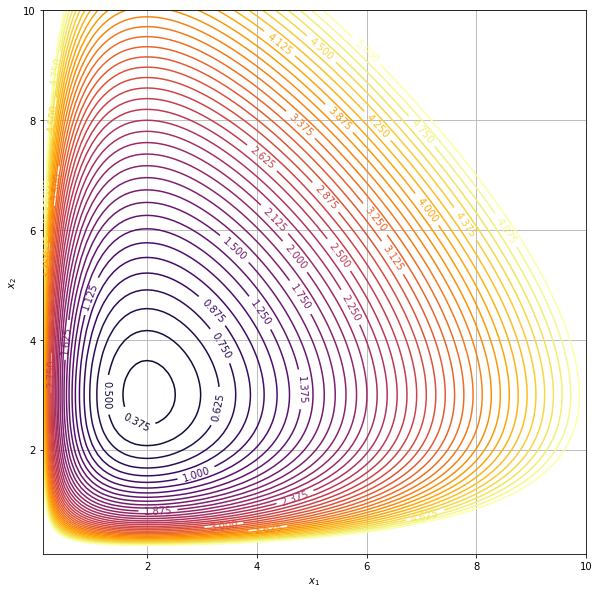

In [117]:
def H(x1,x2,a=3,b=1,c=2,d=1):
    if x1<=0 or x2<=0:
        pass
    return d*x1-c*np.log(x1)+b*x2-a*np.log(x2)

vectH = np.vectorize(H)

display_contour(vectH,x=np.linspace(0.1,10,100),y=np.linspace(0.1,10,100),levels=np.linspace(0,5,41))


6

In [149]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    ti = t0
    xi = x0
    while ti<tf:
        xi = xi + dt*f(ti,xi)
        ti = ti + dt
        x.append(xi)
        t.append(ti)
    tfin = np.array(t)
    xfin = np.array(x)
    return tfin,xfin

tau=2
def equadiffexp(t,x):
    return -(1/tau)*x


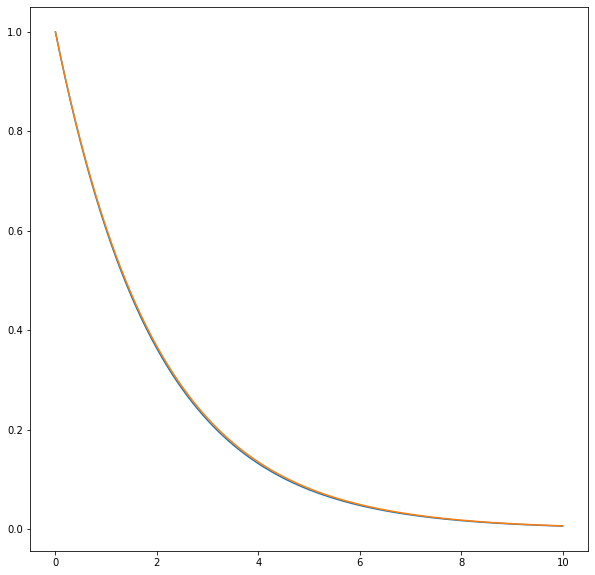

In [150]:
Texp,Xexp=solve_euler_explicit(equadiffexp,np.array([1]),0.05,0,10)

def expo(t):
    return np.exp(-(1/tau)*t)
plt.plot(Texp,Xexp)
plt.plot(Texp,expo(Texp))

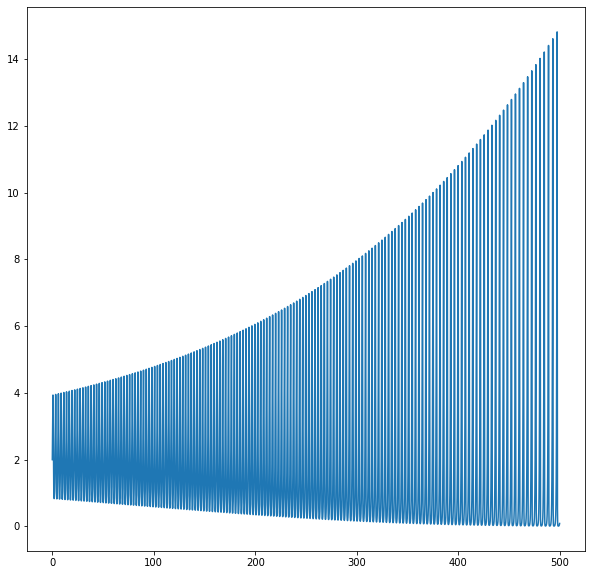

In [151]:
Tsol,LVsol=solve_euler_explicit(lv, np.array([2.0,1.5]), 0.001, 0, 500)
LVsolx=np.array([LVsol[i][0] for i in range(len(LVsol))])
plt.plot(Tsol,LVsolx)

In [ ]:
def solve_euler_implicite()